In [9]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import percolate
from pprint import pprint

In [17]:
import percolate
import importlib as imp

imp.reload(percolate)
grid = percolate.spanning_2d_grid(3)

{'M': 12,
 'N': 9,
 'has_spanning_cluster': False,
 'max_cluster_size': 1,
 'moments': array([8., 8., 8., 8., 8.]),
 'n': 0}
{'M': 12,
 'N': 9,
 'edge': ((2, 1), (3, 1)),
 'has_spanning_cluster': False,
 'max_cluster_size': 2,
 'moments': array([7., 7., 7., 7., 7.]),
 'n': 1}
{'M': 12,
 'N': 9,
 'edge': ((1, 1), (1, 2)),
 'has_spanning_cluster': False,
 'max_cluster_size': 2,
 'moments': array([ 6.,  7.,  9., 13., 21.]),
 'n': 2}
{'M': 12,
 'N': 9,
 'edge': ((2, 0), (2, 1)),
 'has_spanning_cluster': False,
 'max_cluster_size': 3,
 'moments': array([ 5.,  6.,  8., 12., 20.]),
 'n': 3}
{'M': 12,
 'N': 9,
 'edge': ((1, 0), (1, 1)),
 'has_spanning_cluster': False,
 'max_cluster_size': 3,
 'moments': array([ 4.,  6., 12., 30., 84.]),
 'n': 4}
{'M': 12,
 'N': 9,
 'edge': ((1, 2), (2, 2)),
 'has_spanning_cluster': False,
 'max_cluster_size': 4,
 'moments': array([ 3.,  5., 11., 29., 83.]),
 'n': 5}
{'M': 12,
 'N': 9,
 'edge': ((2, 1), (2, 2)),
 'has_spanning_cluster': True,
 'max_cluster_size

/opt/sagemath-9.2/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


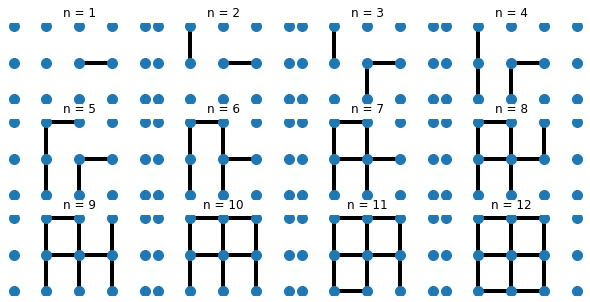

In [18]:
edges = list()
fig, axes = plt.subplots(figsize=(8.0, 4.0), ncols=4, nrows=3, squeeze=True)
axes = axes.ravel()
for i, sample_state in enumerate(percolate.sample_states(grid)):
    if 'edge' in sample_state:
        edge = sample_state['edge']
        edges.append(edge)
        nx.draw(
            grid,
            ax=axes[i - 1],
            edgelist=edges,
            width=4,
            pos={node: node for node in grid.nodes()},
            node_size=100,
        )
        axes[i - 1].set_title('n = {}'.format(i))
    pprint(sample_state)
plt.tight_layout()
plt.show()

/opt/sagemath-9.2/local/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


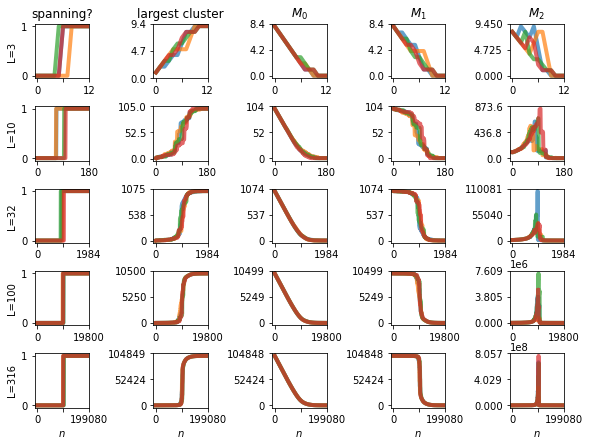

In [20]:
runs = 4

grid_ls = [3, 10, 32, 100, 316]
# generate the square grid graphs with spanning cluster detection
# for all system sizes
grid_graphs = [ percolate.spanning_2d_grid(l) for l in grid_ls ]
# compute the single-run cluster statistics for all sample states
# and system sizes
grid_single_runs = [
    [ percolate.single_run_arrays(graph=grid_graph) for _ in range(runs) ]
    for grid_graph in grid_graphs
]
# plot
fig, axes = plt.subplots(
    nrows=len(grid_ls), ncols=5, squeeze=True, figsize=(8.0, 6.0)
)
for l_index, l in enumerate(grid_ls):
    for single_run in grid_single_runs[l_index]:
        axes[l_index, 0].plot(
            single_run['has_spanning_cluster'], lw=4, alpha=0.7, rasterized=True
        )
        axes[l_index, 1].plot(
            single_run['max_cluster_size'], lw=4, alpha=0.7, rasterized=True
        )
        for k in range(3):
            axes[l_index, k + 2].plot(
                single_run['moments'][k], lw=4, alpha=0.7, rasterized=True
            )

    axes[l_index, 0].set_ylabel(r'L={}'.format(l))

    for ax in axes[l_index, :]:
        num_edges = grid_single_runs[l_index][0]['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_xticklabels(['0', '', num_edges])
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))

    axes[l_index, 0].set_yticks([0, 1])

axes[0, 0].set_title(r'spanning?')
axes[0, 1].set_title(r'largest cluster')
for k in range(3):
    axes[0, k + 2].set_title(r'$M_{}$'.format(k))

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')

plt.tight_layout()
plt.show()

/opt/sagemath-9.2/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


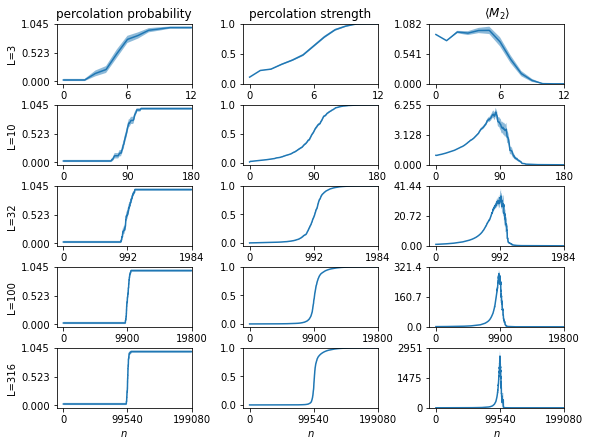

In [21]:
grid_runs = 40
# system sizes
grid_ls = [3, 10, 32, 100, 316]
# generate the square grid graphs with spanning cluster detection
# for all system sizes
grid_graphs = [ percolate.spanning_2d_grid(l) for l in grid_ls ]
# compute the microcanonical averages for all system sizes
grid_microcanonical_averages = [
    percolate.microcanonical_averages(
        graph=grid_graph, runs=grid_runs
    )
    for grid_graph in grid_graphs
]
# combine microcanonical averages into one array
grid_microcanonical_averages_arrays = [
    percolate.microcanonical_averages_arrays(avg)
    for avg in grid_microcanonical_averages
]
# plot
fig, axes = plt.subplots(
    nrows=len(grid_ls), ncols=3, squeeze=True, figsize=(8.0, 6.0)
)
for l_index, l in enumerate(grid_ls):
    avg_arrays = grid_microcanonical_averages_arrays[l_index]

    line, = axes[l_index, 0].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['spanning_cluster'],
        rasterized=True,
    )
    axes[l_index, 0].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['spanning_cluster_ci'].T[1],
        avg_arrays['spanning_cluster_ci'].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )

    line, = axes[l_index, 1].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['max_cluster_size'],
        rasterized=True,
    )
    axes[l_index, 1].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['max_cluster_size_ci'].T[1],
        avg_arrays['max_cluster_size_ci'].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )

    axes[l_index, 2].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['moments'][2],
        rasterized=True,
    )
    axes[l_index, 2].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['moments_ci'][2].T[1],
        avg_arrays['moments_ci'][2].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )


    axes[l_index, 0].set_ylabel(r'L={}'.format(l))
    axes[l_index, 1].set_ylim(ymax=1.0)
    axes[l_index, 2].set_ylim(ymin=0.0)

    for ax in axes[l_index, :]:
        num_edges = avg_arrays['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))

axes[0, 0].set_title(r'percolation probability')
axes[0, 1].set_title(r'percolation strength')
axes[0, 2].set_title(r'$\langle M_2 \rangle$')

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')

plt.tight_layout()
plt.show()


/opt/sagemath-9.2/local/lib/python3.7/site-packages/ipykernel_launcher.py:110: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


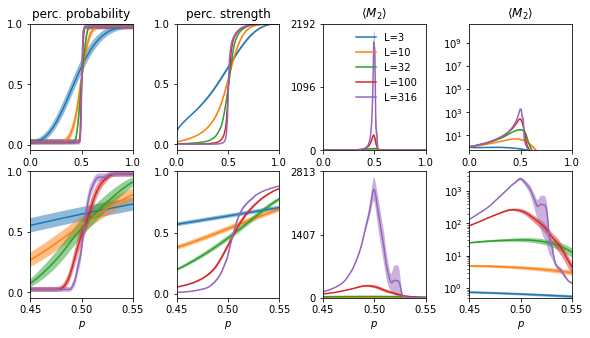

In [22]:
# occupation probabilities
grid_ps_arrays = [ np.linspace(0.5 - x, 0.5 + x, num=100) for x in [0.5, 0.05] ]
# compute canonical averages from microcanonical averages
# for all occupation probabilities and system sizes
grid_stats = [
    [
        percolate.canonical_averages(ps, avg_arrays)
        for avg_arrays in grid_microcanonical_averages_arrays
    ]
    for ps in grid_ps_arrays
]
# plot
fig, axes = plt.subplots(
    nrows=len(grid_ps_arrays), ncols=4, squeeze=True, figsize=(8.0, 4.5)
)
for ps_index, ps in enumerate(grid_ps_arrays):
    for l_index, l in enumerate(grid_ls):
        my_stats = grid_stats[ps_index][l_index]

        line, = axes[ps_index, 0].plot(
            ps,
            my_stats['spanning_cluster'],
            rasterized=True,
            label=r'L={}'.format(l),
        )
        axes[ps_index, 0].fill_between(
            ps,
            my_stats['spanning_cluster_ci'].T[1],
            my_stats['spanning_cluster_ci'].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )

        line, = axes[ps_index, 1].plot(
            ps,
            my_stats['max_cluster_size'],
            rasterized=True,
            label=r'L={}'.format(l),
        )
        axes[ps_index, 1].fill_between(
            ps,
            my_stats['max_cluster_size_ci'].T[1],
            my_stats['max_cluster_size_ci'].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )

        axes[ps_index, 2].plot(
            ps,
            my_stats['moments'][2],
            rasterized=True,
            label=r'L={}'.format(l),
        )
        axes[ps_index, 2].fill_between(
            ps,
            my_stats['moments_ci'][2].T[1],
            my_stats['moments_ci'][2].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )

        axes[ps_index, 3].semilogy(
            ps,
            my_stats['moments'][2],
            rasterized=True,
        )
        axes[ps_index, 3].fill_between(
            ps,
            np.where(
                my_stats['moments_ci'][2].T[1] > 0.0,
                my_stats['moments_ci'][2].T[1],
                0.01
            ),
            np.where(
                my_stats['moments_ci'][2].T[0] > 0.0,
                my_stats['moments_ci'][2].T[0],
                0.01
            ),
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )


    axes[ps_index, 0].set_ylim(ymax=1.0)
    axes[ps_index, 1].set_ylim(ymax=1.0)
    axes[ps_index, 2].set_ylim(ymin=0.0)
    axes[ps_index, 3].set_ylim(ymin=0.5)

    for ax in axes[ps_index, :]:
        ax.set_xlim(xmin=ps.min(), xmax=ps.max())
        ax.set_xticks(np.linspace(ps.min(), ps.max(), num=3))

    for ax in axes[ps_index, :-1]:
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))

axes[0, 0].set_title(r'perc. probability')
axes[0, 1].set_title(r'perc. strength')
axes[0, 2].set_title(r'$\langle M_2 \rangle$')
axes[0, 3].set_title(r'$\langle M_2 \rangle$')

for ax in axes[-1, :]:
    ax.set_xlabel(r'$p$')

axes[0, 2].legend(frameon=False, loc='best')

plt.tight_layout()
plt.show()
